In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans

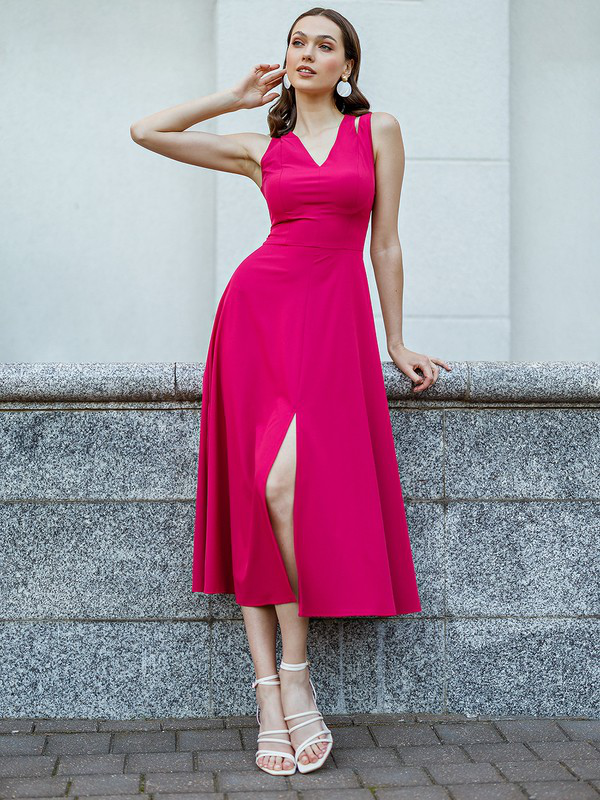

In [ ]:
img1 = Image.open('dress.jpg')
img1

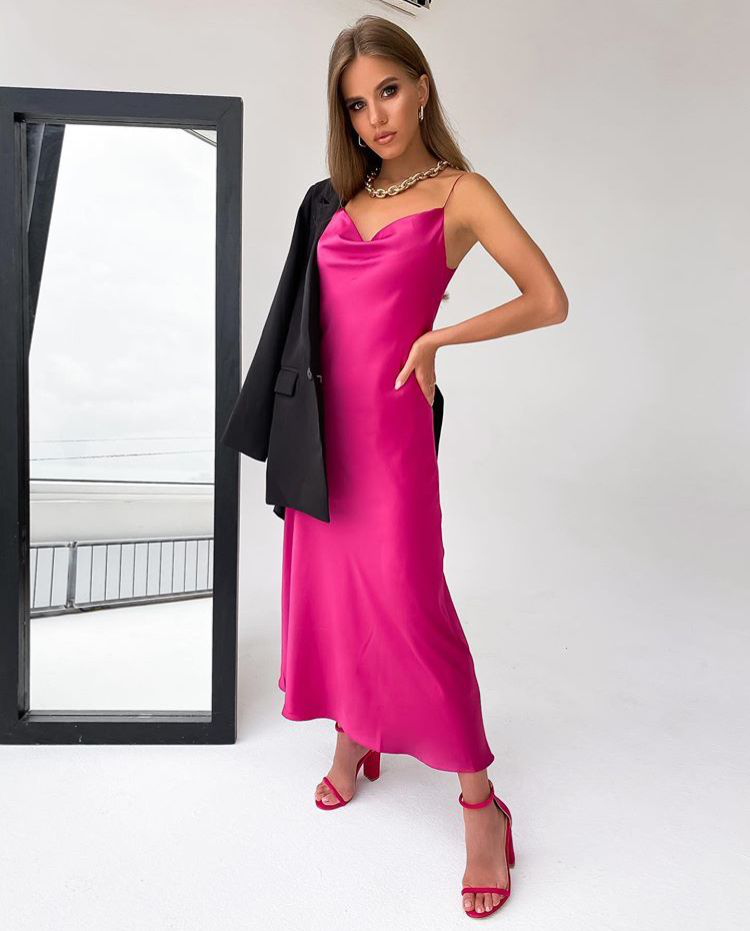

In [ ]:
img2 = Image.open('dress2.jpg')
img2

In [ ]:
def clust(pix):
  #создаем объект для кластеризации
  db=KMeans(n_clusters=30)
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]
  db_clusters=db.fit_predict(data) #вычисляет центры кластеров и убирает выбросы

  #кластеризация
  for p, c in zip(data, db_clusters):
      pix[p[0], p[1]] = (db.cluster_centers_[c, 2],
                         db.cluster_centers_[c, 3],
                         db.cluster_centers_[c, 4])

  plt.imshow(pix)
  return (db_clusters, db.cluster_centers_)

In [ ]:
def result(img, clusters, centers):
  pix = np.array(img)
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]

  #selection
  near = []
  #берем только 2,3,4 потому что 0 и 1 - координаты центров кластера
  for i, c in enumerate(centers):
      if (abs(c[2] - 200) + abs(c[3] - 2) + abs(c[4] - 97) < 90):

        near.append(i)

  mas = np.zeros(pix.shape, np.uint8)

  p_c = img.load()
  gray = np.array([[int((p_c[x, y][0] + p_c[x, y][1] + p_c[x, y][2]) / 3) for x in range(img.size[0])] for y in range(img.size[1])])

  #выделяем цветом нужные кластеры, остальные делаем серыми
  for p, c in zip(data, clusters):
    if c in near:
      mas[p[0], p[1]] = (int(pix[p[0], p[1]][0]),
                          int(pix[p[0], p[1]][1]),
                          int(pix[p[0], p[1]][2]))
    else:
      mas[p[0], p[1]] = (int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]))
  return mas

In [ ]:
centers1

array([[463.15628866, 506.8336377 , 143.10845361, 156.18880707,
        166.46120766],
       [ 63.22121047,  72.26194111, 202.72486369, 215.15305344,
        217.22857143],
       [633.49422088,  85.24635401, 156.6202118 , 172.81065053,
        183.5701059 ],
       [ 63.71184785, 542.08076597, 193.73015046, 207.03719143,
        209.96769361],
       [ 98.83045931, 288.47252216,  92.8109589 ,  60.81321515,
         45.46607575],
       [373.20297658, 292.20439949, 204.65942391,   2.77506442,
         97.53074645],
       [610.23596949, 165.83195504,  89.92862304, 100.55656363,
        107.91995183],
       [740.27354542, 520.01104018, 104.65152784, 110.03573671,
        116.00078485],
       [294.09266552, 425.94911396, 198.49987694, 202.46117401,
        205.30968496],
       [244.3410767 , 190.18626212, 204.08301728, 215.25484619,
        219.40223346],
       [530.96788544, 241.34651745, 155.95704157,   8.39003198,
         57.53830113],
       [ 66.01932754, 414.90181839, 206.067

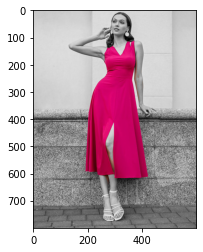

In [ ]:
plt.imshow(result(img1, clusters1, centers1))

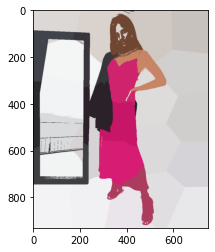

In [ ]:
pix = np.array(img2)
clusters2, centers2 = clust(pix)

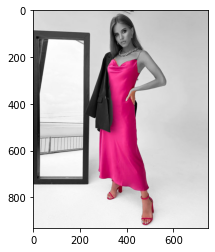

In [ ]:
plt.imshow(result(img2, clusters2, centers2))